In [63]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

1. IMPORT DATASET

In [64]:
#a/ Load the data set
df = pd.read_excel("Data_AIL.xlsx")
df.head()

,e,no. video,Student ID,Full name,id,standardized dish,dish occurence (based on transcript),dish imply,start time,end time,...,sauce (based on transcript),venue,container,describe how to make it,viewer feeling of youtuber's style,viewer feeling of presented food,YouTuber feeling,location,foreigner,Unnamed: 24
0,1.0,51.0,NaN,NaN,5OzrpNCyXqs,snail vermicelli soup,bun oc,NaN,1:05,3:21,...,NaN,street restaurant,bowl,1.0,4.0,NaN,5.0,HN,1.0,NaN
1,2.0,51.0,NaN,NaN,5OzrpNCyXqs,vermicelli with fried tofu and shrimp paste,bun dau mam tom,NaN,3:32,6:10,...,"fish sauce, fermented shrimp paste, pepper, ch...",street restaurant,tray,1.0,4.0,NaN,4.0,HN,1.0,NaN
2,3.0,51.0,NaN,NaN,5OzrpNCyXqs,fried spring roll,spring roll,NaN,5:23,6:10,...,"fish sauce, sweet spicy garlic sauce",street restaurant,plate,0.0,5.0,NaN,5.0,HN,1.0,NaN
3,4.0,51.0,NaN,NaN,5OzrpNCyXqs,steamed rolled rice pancake,banh cuon,NaN,6:22,9:23,...,"garlic water, fried caramelized scallion, pepp...",street restaurant,plate,1.0,5.0,NaN,5.0,HN,1.0,NaN
4,5.0,51.0,NaN,NaN,5OzrpNCyXqs,shrimp cake,shrimp cake,NaN,9:42,11:55,...,"chili, sweet spicy sauce",street restaurant,plate,1.0,4.0,NaN,5.0,HN,1.0,NaN


In [65]:
print(df.shape)

(3850, 25)


In [66]:
#b/ Select features
data = df[["start time","end time","Unnamed: 11","viewer feeling of youtuber's style "]]

In [67]:
data.head()

,start time,end time,Unnamed: 11,viewer feeling of youtuber's style
0,1:05,3:21,9,4.0
1,3:32,6:10,11,4.0
2,5:23,6:10,4,5.0
3,6:22,9:23,5,5.0
4,9:42,11:55,4,4.0


In [68]:
data= data.dropna(axis= 0)
data.describe()

,Unnamed: 11
count,3771.000000
mean,3.279236
std,2.804457
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,20.000000


In [69]:
# convert start time and end time to seconds
import re
def __check_value_time(hours=0, minutes=0, seconds=0):
    # print('Time out: 'hours, minutes, seconds)
    if hours > 24:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Hour is out of range')

    if seconds > 60:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Second is out of range')

    if minutes > 60:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Minutes is out of range')

def process_time_str(time_str):
    time_data = re.findall('[0-9]?[0-9]', time_str)
    TIME_WITH_HOUR = 3
    TIME_WITH_MINUTES = 2
    TIME_WITH_SECONDS = 1
    MAX_SECONDS = 90060
    # print(time_data)
    if len(time_data) == TIME_WITH_HOUR:
        hours = int(time_data[0])
        minutes = int(time_data[1])
        seconds = int(time_data[2])

        __check_value_time(hours, seconds, minutes)

        return (hours*3600 + minutes*60 + seconds)
    if len(time_data) == TIME_WITH_MINUTES:
        minutes = int(time_data[0])
        seconds = int(time_data[1])

        __check_value_time(minutes=minutes, seconds=seconds)

        return (minutes*60 + seconds)
    if len(time_data) == TIME_WITH_SECONDS:
        seconds = int(time_data[0])

        __check_value_time(seconds=seconds)

        return seconds

In [70]:
index_data = list()
for str_time in data['start time']:
    if str_time[0].isdigit() and str_time[-1].isdigit():
        index_data.append(True)
    else:
        index_data.append(False)

data = data[index_data]

index_data = list()
for str_time in data['end time']:
    if str_time[0].isdigit() and str_time[-1].isdigit():
        index_data.append(True)
    else:
        index_data.append(False)
data = data[index_data]
df_time = list()

for start_time, end_time in zip(data['start time'], data['end time']):
    df_time.append((process_time_str(start_time), process_time_str(end_time)))

data[['start time', 'end time']] = df_time
data["viewer feeling of youtuber's style "] = data["viewer feeling of youtuber's style "].astype('int')


In [71]:
data['duration'] = data['end time']- data['start time']

In [72]:
data= data.loc[data['duration']>=0]
data = data.loc[data["viewer feeling of youtuber's style "]!=0]
data.head()

,start time,end time,Unnamed: 11,viewer feeling of youtuber's style,duration
0,65,201,9,4,136
1,212,370,11,4,158
2,323,370,4,5,47
3,382,563,5,5,181
4,582,715,4,4,133


<AxesSubplot:title={'center':'Weight of class'}, ylabel='duration'>

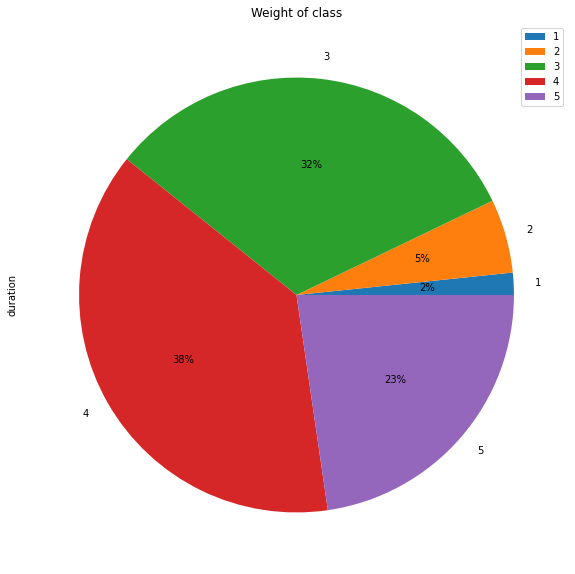

In [73]:
# Plotting the pie chart for above dataframe
data.groupby(["viewer feeling of youtuber's style "]).count().plot(kind='pie',y = "duration", autopct='%1.0f%%',figsize=(15,10), title= "Weight of class")

<AxesSubplot:>

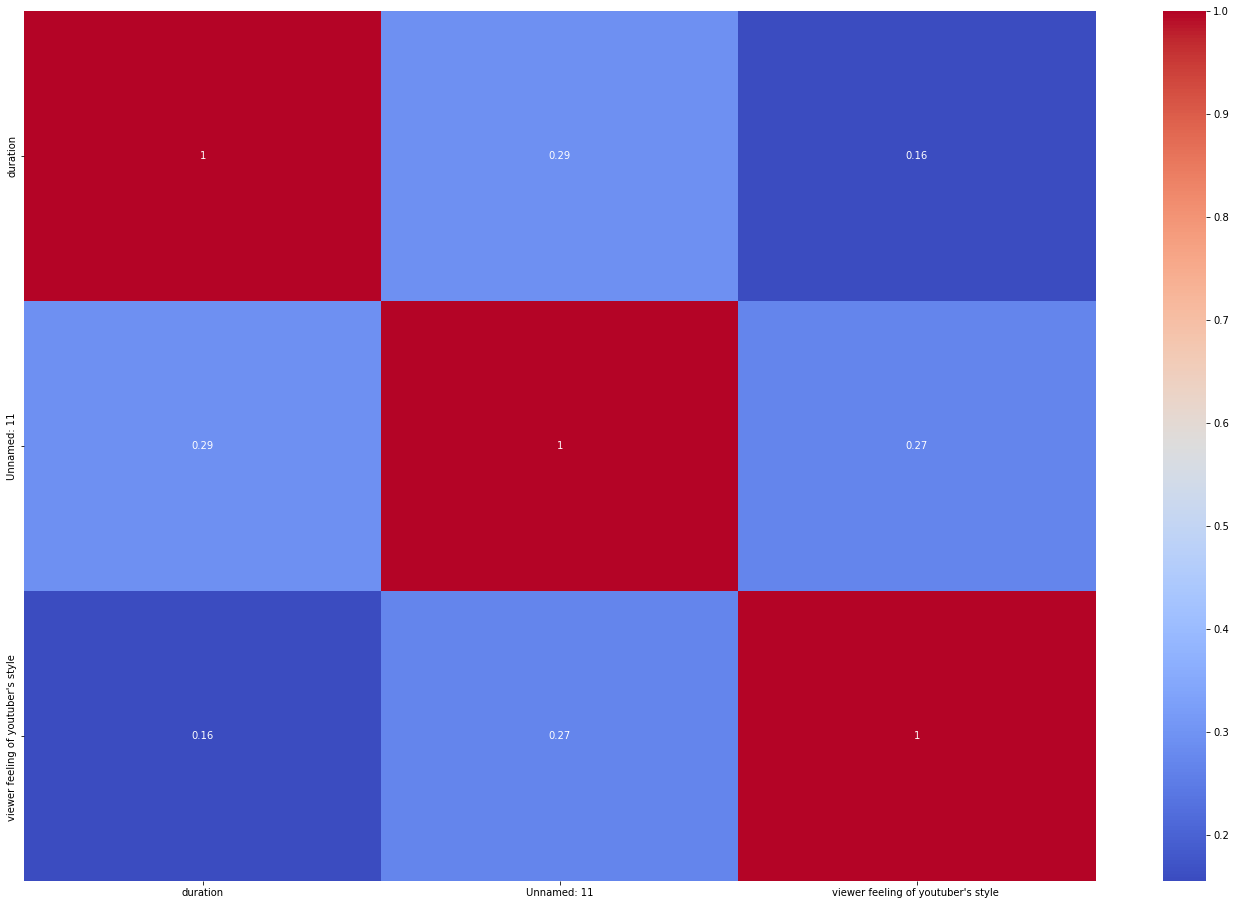

In [74]:
#Plot correlation matrix
plt.figure(figsize = (24,16))
sns.heatmap(pd.concat([data[['duration', 'Unnamed: 11']],data["viewer feeling of youtuber's style "]], axis=1).corr(), annot=True, cmap="coolwarm")

In [75]:
# Normalization
data['duration'] = (data['duration']-data['duration'].mean())/(data['duration'].max()- data['duration'].min())
data['Unnamed: 11'] = (data['Unnamed: 11']-data['Unnamed: 11'].mean())/(data['Unnamed: 11'].max() - data['Unnamed: 11'].min())

# Phân loại 
input_data = data[['duration', 'Unnamed: 11']]
output_data = data["viewer feeling of youtuber's style "]

In [76]:
#convert to numpy
x=input_data.to_numpy()
y=output_data.to_numpy()
print(x,y)


[[ 0.02595682  0.28539584]
 [ 0.03919388  0.38539584]
 [-0.02759312  0.03539584]
 ...
 [ 0.05844779 -0.01460416]
 [ 0.1408786   0.03539584]
 [ 0.24015658  0.03539584]] [4 4 5 ... 4 4 3]


In [77]:

#c/ Split it into two parts: 70% of which you will use to train your model and the remaining data will be used to test the model.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=0)

In [78]:
print(x_train.shape)
print(x_test.shape)

(2590, 2)
(1111, 2)


3. BUILD MODEL

In [79]:
#m = number of samples, n= number of features
m,n = x_train.shape

In [80]:
#add collumn 1 in x
x_train0 = np.hstack((np.ones((x_train.shape[0],1)),x_train))
x_test0 = np.hstack((np.ones((x_test.shape[0],1)),x_test))

In [81]:
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

Setup our neural network

In [82]:
#we set up for neural network have only 3 layer: input 1, hidden 1, output 1
input_layer_size = n                      # Dimension of features
hidden_layer_size = input_layer_size*2    # of units in hidden layer
output_layer_size = 5    # number of labels


INITIALIZE WEIGHT

Now, we can initialise our weights to random small values (remember these are also called theta’s). For gradient descent, its OK to initalise to zero's, but for neural networks, it works out better if we initialise our weights to some random values. Here we develop a handy function to perform the initialization.

In [83]:
def initializeWeights(L_in, L_out):
    epsilon_init = 0.12
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
    return W

In [84]:
initial_Theta1 = initializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = initializeWeights(hidden_layer_size, output_layer_size)
nn_params = np.concatenate((initial_Theta1.flatten(), initial_Theta2.flatten()), axis=None)

In [85]:

from checknn import *

print('Checking Backpropagation... ')
# Weight regularization parameter (we set this to 1 here).
lambda_ = 1
#  Check gradients by running checkNNGradients
checkNNGradients(lambda_)

Checking Backpropagation... 
[[ 0.01231622  0.01231622]
 [ 0.01835978  0.01835978]
 [ 0.00308386  0.00308386]
 [-0.01502735 -0.01502735]
 [ 0.00392471  0.00392471]
 [-0.00539821 -0.00539821]
 [ 0.013362    0.013362  ]
 [ 0.01983725  0.01983725]
 [-0.00808459 -0.00808459]
 [-0.01084911 -0.01084911]
 [-0.02002159 -0.02002159]
 [-0.01078632 -0.01078632]
 [-0.01266691 -0.01266691]
 [ 0.01965602  0.01965602]
 [ 0.01276025  0.01276025]
 [-0.00586723 -0.00586723]
 [-0.00559343 -0.00559343]
 [-0.01521978 -0.01521978]
 [ 0.00275391  0.00275391]
 [ 0.01819567  0.01819567]
 [ 0.30934772  0.30934772]
 [ 0.17925309  0.17925309]
 [ 0.14985892  0.14985892]
 [ 0.14313253  0.14313253]
 [ 0.13843822  0.13843822]
 [ 0.14164805  0.14164805]
 [ 0.108133    0.108133  ]
 [ 0.07595054  0.07595054]
 [ 0.06019342  0.06019342]
 [ 0.04385492  0.04385492]
 [ 0.03530847  0.03530847]
 [ 0.0410438   0.0410438 ]
 [ 0.10627037  0.10627037]
 [ 0.07557325  0.07557325]
 [ 0.06356257  0.06356257]
 [ 0.04812245  0.04812245]

In [86]:
from checknn import *

print('Checking Cost Function (w/ Regularization) ... ')
J, g = nnCostFunction2(nn_params, input_layer_size, hidden_layer_size, output_layer_size, x_train, y_train, lambda_)

print(f'Cost at parameters (loaded from ex4weights): {J:f} \n(this value should be about 1.776110)')
g

Checking Cost Function (w/ Regularization) ... 
Cost at parameters (loaded from ex4weights): 3.509365 
(this value should be about 1.776110)


array([ 2.00424508e-03,  1.41444089e-05, -5.71949290e-05,  1.39043189e-02,
       -3.19086628e-05,  8.32021587e-06,  1.28849058e-02,  1.28779226e-05,
        1.72146068e-04,  4.32023573e-04, -1.46350274e-04, -6.93997885e-04,
        4.74914747e-01,  2.31638626e-01,  2.34961352e-01,  2.37301339e-01,
        2.50173574e-01,  4.82439354e-01,  2.35321277e-01,  2.38816721e-01,
        2.41024587e-01,  2.54025090e-01,  1.48709165e-01,  7.25880155e-02,
        7.38664463e-02,  7.41391027e-02,  7.82048470e-02,  1.35750090e-01,
        6.61924723e-02,  6.70750322e-02,  6.78964468e-02,  7.15051680e-02,
        2.75525658e-01,  1.34224015e-01,  1.36018208e-01,  1.37864592e-01,
        1.45260184e-01])

In [87]:
print('Training Neural Network... ')

#  Change the MaxIter to a larger value to see how more training helps.
options = {'maxiter': 50, 'disp': True}

#  You should also try different values of lambda
lambda_ = 1

# Create "short hand" for the cost function to be minimized
fun = lambda nn_params: nnCostFunction2(nn_params, input_layer_size, hidden_layer_size, output_layer_size, x_train, y_train, lambda_)[0]
jac = lambda nn_params: nnCostFunction2(nn_params, input_layer_size, hidden_layer_size, output_layer_size, x_train, y_train, lambda_)[1]

# Now, costFunction is a function that takes in only one argument (the neural network parameters)
from scipy import optimize as opt
res = opt.minimize(fun, nn_params, method='CG', jac=jac, options=options)
nn_params = res.x
cost = res.fun

print(res.message)

Training Neural Network... 
         Current function value: 2.078982
         Iterations: 50
         Function evaluations: 117
         Gradient evaluations: 117
Maximum number of iterations has been exceeded.


In [88]:
# Obtain Theta1 and Theta2 back from nn_params
Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)].reshape((hidden_layer_size, input_layer_size + 1))
Theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):].reshape((output_layer_size, hidden_layer_size + 1))

print(cost)

2.078982370603713


In [89]:
y_predict = predict(Theta1, Theta2, x_test)
print(y_predict.shape,y_test.shape)

(1111,) (1111,)


In [90]:
print(f'Training Set Accuracy: {(y_predict == y_test).mean() * 100:f}')

Training Set Accuracy: 41.044104


In [91]:
#compare
result = pd.DataFrame({'Actual Value':y_test.reshape(y_test.shape[0],),'Predicted Value':y_predict.reshape(y_predict.shape[0],),"Difference": (y_test - y_predict).reshape(y_test.shape[0])})
result[0:30]

,Actual Value,Predicted Value,Difference
0,4,3,1
1,3,4,-1
2,4,3,1
3,5,4,1
4,4,3,1
5,5,3,2
6,3,4,-1
7,4,3,1
8,4,4,0
9,2,3,-1
